# Python, pandas, imports boilerplate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sxof_data.csv', sep=';', index_col=0)

In [3]:
data.head()

,region,sex,age,income,isMarried,nchildren,religious,education,occupation,rate_marriage,naffairs
id,,,,,,,,,,,
1,3,1,37,"563680,0625",1,0,3,18,5,4,0
2,1,0,27,"270797,5938",0,0,4,14,1,1,0
3,3,0,32,"365333,3438",0,1,1,12,1,1,0
4,1,1,57,"563680,0625",1,1,5,18,1,5,0
5,2,1,22,"253485,5938",0,0,2,17,3,1,0


income uses ',' as a separator, therefore pandas incorrectly parses it as a string

In [4]:
data['income'] = data['income'].apply(lambda x: x.replace(',', '.')).astype(np.float64)

quick overview, not really interesting

In [5]:
data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 1 to 601
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         601 non-null    int64  
 1   sex            601 non-null    int64  
 2   age            601 non-null    int64  
 3   income         601 non-null    float64
 4   isMarried      601 non-null    int64  
 5   nchildren      601 non-null    int64  
 6   religious      601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rate_marriage  601 non-null    int64  
 10  naffairs       601 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 56.3 KB


(None,
            region         sex         age        income   isMarried  \
 count  601.000000  601.000000  601.000000  6.010000e+02  601.000000   
 mean     2.001664    0.475874   32.582363  3.794328e+05    0.507488   
 std      0.823608    0.499834    9.182971  2.699736e+05    0.500360   
 min      1.000000    0.000000   22.000000  2.274890e+04    0.000000   
 25%      1.000000    0.000000   27.000000  1.974000e+05    0.000000   
 50%      2.000000    0.000000   32.000000  2.932424e+05    1.000000   
 75%      3.000000    1.000000   37.000000  4.838200e+05    1.000000   
 max      3.000000    1.000000   57.000000  2.194300e+06    1.000000   
 
         nchildren   religious   education  occupation  rate_marriage  \
 count  601.000000  601.000000  601.000000  601.000000     601.000000   
 mean     0.715474    3.116473   16.166389    2.988353       2.470882   
 std      0.451564    1.167509    2.402555    1.425318       1.669202   
 min      0.000000    1.000000    9.000000    1.000

# Problem 1

## b)

It makes sense to plot a histogram since I am asked to 'identify' the distribution

See https://seaborn.pydata.org/generated/seaborn.distplot.html

In [6]:
import seaborn as sns

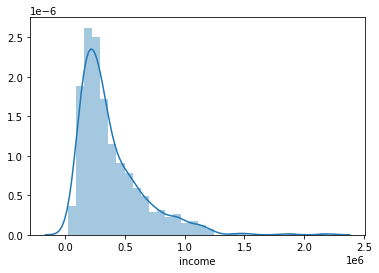

In [7]:
sns.distplot(data['income']);

Seaborn also estimates the pdf, which makes it easier to 'identify' the distribution

At first glance, the distributions appears to be log normal as it is more right skewed

To actually test the null hypothesis I will use the Shapiro test at $\alpha=0.01$ significance level

See [Shapiro-Wilk wikipedia page](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) and https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

The null-hypothesis of this test is that the population is normally distributed, therefore, the hypothesis will be rejected if $p$-value $< \alpha$

In [8]:
from scipy.stats import shapiro

shapiro(data['income'])

ShapiroResult(statistic=0.8353692889213562, pvalue=2.0044760358591868e-24)

The $p$-value computed is much less than the significance level $\alpha$ that was chosen. So, there is enough evidence that the null-hypothesis should be rejected

## c)

A log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed (taken from [wiki](https://en.wikipedia.org/wiki/Log-normal_distribution))

I will firstly transform the income variable using [numpy.log](https://numpy.org/doc/stable/reference/generated/numpy.log.html)

In [9]:
inc_log = np.log(data['income'])

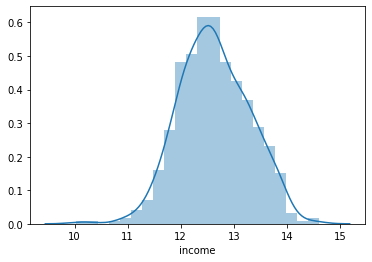

In [10]:
sns.distplot(inc_log);

The distributions seems to look log-normal

The procedure of testing the null hypothesis will be absolutely identical to (a)

Hypothesis will be tested at $\alpha=0.05$ significance level

The null-hypothesis of this test is that the population is normally distributed, therefore, the hypothesis will be rejected if $p$-value $< \alpha$

In [11]:
from scipy.stats import shapiro

shapiro(inc_log)

ShapiroResult(statistic=0.9948233366012573, pvalue=0.040327854454517365)

The $p$-value computed is greater than the significance level $\alpha$ that was chosen. So, I cannot reject the hypothesis that the sample comes from a population which has a normal distribution

# Problem 2

## a)

I will test for association between region and sex at $\alpha=0.01$ significance level

$H_0$: There is no association

$H_1$: There is an association

I will use [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

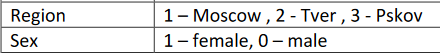

In [12]:
crosstab = pd.crosstab(data['region'], data['sex'])
crosstab

sex,0,1
region,,
1,101,102
2,105,89
3,109,95


In [13]:
from scipy.stats import chi2_contingency

pval = chi2_contingency(crosstab)[1]
print(f"P-value: {pval}")

P-value: 0.6414553979577649


Reported p-value is greater than the significance level, therefore, the null hypothesis cannot be rejected, which means that the proportion of female households does not vary among various regions

## b)

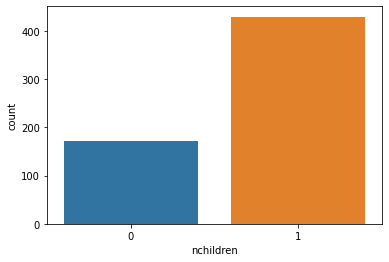

In [14]:
sns.countplot(data['nchildren']);

Number of children can be thought of as a categorical variable, as it is discrete and does not exceed 1 (although it is possible in real life, cases where the number of children is greater than 5 are quite rare)

Similarly to (a) association test will be used, with $\alpha=0.05$ significance level to test the hypotheses:

$H_0$: There is no association between the number of children and the region

$H_1$: There is an association

In [15]:
crosstab = pd.crosstab(data['region'], data['nchildren'])
crosstab

nchildren,0,1
region,,
1,59,144
2,59,135
3,53,151


In [16]:
pval = chi2_contingency(crosstab)[1]
print(f"P-value: {pval}")

P-value: 0.60176883895754


Reported p-value is greater than the significance level, therefore, the null hypothesis cannot be rejected, which means that there is no association between the number of children and the region

## c)

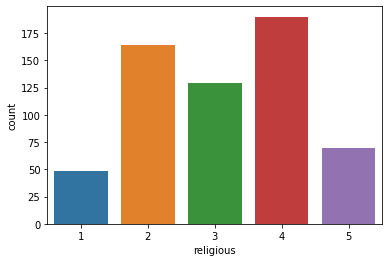

In [17]:
sns.countplot(data['religious']);

Similarly to (a) association test will be used, with $\alpha=0.05$ significance level to test the hypotheses:

$H_0$: There is no association between the religious preferences and the region

$H_1$: There is an association

In [18]:
crosstab = pd.crosstab(data['religious'], data['region'])
crosstab

region,1,2,3
religious,,,
1,13,15,20
2,53,56,55
3,47,36,46
4,69,62,59
5,21,25,24


In [19]:
pval = chi2_contingency(crosstab)[1]
print(f"P-value: {pval}")

P-value: 0.8270044311628939


Reported p-value is greater than the significance level, therefore, the null hypothesis canot be rejected at $5\%$ significance level, which means that there is no association between the religious preferences and the region

## d)

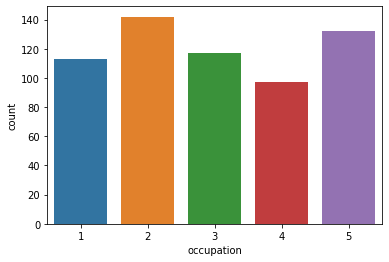

In [20]:
sns.countplot(data['occupation']);

Similarly to (a) association test will be used, with $\alpha=0.05$ significance level to test the hypotheses:

$H_0$: There is no association between the occupation and the region

$H_1$: There is an association

In [21]:
crosstab = pd.crosstab(data['occupation'], data['region'])
crosstab

region,1,2,3
occupation,,,
1,44,28,41
2,34,52,56
3,46,39,32
4,33,35,29
5,46,40,46


In [22]:
pval = chi2_contingency(crosstab)[1]
print(f"P-value: {pval}")

P-value: 0.1138935573071235


Reported p-value is greater than the significance level, therefore, the null hypothesis cannot be rejected at $5\%$ significance level, which means that there is no association between the occupation and the region

## e)

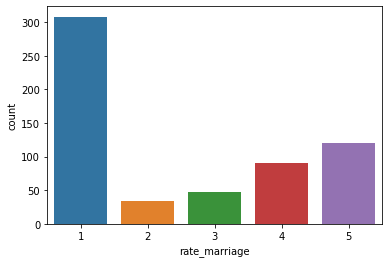

In [23]:
sns.countplot(data['rate_marriage']);

As the data is given in categorical format, 
similarly to (a) association test will be used, with $\alpha=0.05$ significance level to test the hypotheses:

$H_0$: There is no association between the length of marriage and the gender (biologically, sex)

$H_1$: There is an association

In [24]:
crosstab = pd.crosstab(data['rate_marriage'], data['sex'])
crosstab

sex,0,1
rate_marriage,,
1,171,137
2,17,17
3,24,24
4,37,53
5,66,55


In [25]:
pval = chi2_contingency(crosstab)[1]
print(f"P-value: {pval}")

P-value: 0.18380833581628248


Reported p-value is greater than the significance level, therefore, the null hypothesis cannot be rejected at $5\%$ significance level, which means that there is no association between the length of marriage and the gender

## f)

<del>Since the distribution of income are log-normal I will firstly tranform the variable using [numpy.log](https://numpy.org/doc/stable/reference/generated/numpy.log.html)</del>

$\uparrow$ This will be done in (g)

In [26]:
gb = data.groupby(['sex'])['income'].agg(['mean', 'std', 'count'])
gb

,mean,std,count
sex,,,
0,390793.253367,282828.037428,315
1,366920.502964,254975.923838,286


The hypotheses are:

$H_0$: There is no difference in income means (i.e. $\mu_0 = \mu_1$)

$H_1$: There is a difference (i.e. $\mu_0 \neq \mu_1$)

It makes sense to use a [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) to test the hypothesis that two populations have equal means (I assume that variances are unequal; although I should have tested it using a significance level, I will not do it for brevity)

However, the sample size is quite large, so the test statistic
$$ Z = \frac{\overline X_0 - \overline X_1}{\sqrt{\frac{S_0^2}{n_0} + \frac{S_1^2}{n_1}}} \text{~} N(0, 1) \text{ (under} H_0\text{)} $$

I will test the null hypothesis at $\alpha = 0.05$ significance level

I have not found the function in scipy library, so I will write my own

In [27]:
from scipy.stats import norm
def z_score(mux, muy, stdx, stdy, nx, ny):
    numerator = mux-muy
    denominator = np.sqrt(stdx*stdx/nx + stdy*stdy/ny)
    return numerator / denominator

def z_pval(z):
    # test is 2 tailed
    if z > 0:
        z = -z
    return 2 * norm.cdf(z)

### All regions

In [28]:
z = z_score(gb['mean'][0], gb['mean'][1],
            gb['std'][0], gb['std'][1],
            gb['count'][0], gb['count'][1])

In [29]:
print(f'P-value: {z_pval(z)}')

P-value: 0.2765021199804204


Reported p-value is greater than the significance level, therefore, the null hypothesis cannot be rejected at $5\%$ significance level, which means that there is no difference in income means (i.e. $\mu_0 = \mu_1$)

### By region

The hypotheses for a particular region are:

$H_0$: There is no difference in means of income (i.e. $\mu_0 = \mu_1$)

$H_1$: There is a difference (i.e. $\mu_0 \neq \mu_1$)

As in (f) I will use $\alpha=0.05$ significance level

In [30]:
alpha=0.05

for reg in data['region'].unique():
    tmp = data[data['region']==reg]
    gb = tmp.groupby(['sex'])['income'].agg(['mean', 'std', 'count'])
    z = z_score(gb['mean'][0], gb['mean'][1],
                gb['std'][0], gb['std'][1],
                gb['count'][0], gb['count'][1])
    
    pval = z_pval(z)    
    sanity = ''
    if pval < alpha:
        sanity = 'Null hypothesis should be rejected'
    else:
        sanity = 'Null hypothesis cannot be rejected at 5% significance level'
    print(f'region {reg}, p-value: {pval}\nConclusion: {sanity}\n')

region 3, p-value: 0.9033436049126295
Conclusion: Null hypothesis cannot be rejected at 5% significance level

region 1, p-value: 0.8215634496885191
Conclusion: Null hypothesis cannot be rejected at 5% significance level

region 2, p-value: 0.1627542812207411
Conclusion: Null hypothesis cannot be rejected at 5% significance level



## g)

I will firstly tranform the variable using [numpy.log](https://numpy.org/doc/stable/reference/generated/numpy.log.html)

In [31]:
data['income_log'] = np.log(data['income'])

In [32]:
gb = data.groupby(['sex'])['income_log'].agg(['mean', 'std', 'count'])
gb

,mean,std,count
sex,,,
0,12.648616,0.685723,315
1,12.611082,0.630883,286


Similarly to (f):

The hypotheses are:

$H_0$: There is no difference in income means (i.e. $\mu_0 = \mu_1$)

$H_1$: There is a difference (i.e. $\mu_0 \neq \mu_1$)

The sample size is quite large, so the test statistic

$$ Z = \frac{\overline X_0 - \overline X_1}{\sqrt{\frac{S_0^2}{n_0} + \frac{S_1^2}{n_1}}} \text{~} N(0, 1) \text{ (under} H_0\text{)} $$

I will test the null hypothesis at $\alpha = 0.05$ significance level

In [33]:
z = z_score(gb['mean'][0], gb['mean'][1],
            gb['std'][0], gb['std'][1],
            gb['count'][0], gb['count'][1])

In [34]:
print(f'P-value: {z_pval(z)}')

P-value: 0.4846358814711116


Reported p-value is greater than the significance level, therefore, the null hypothesis cannot be rejected at $5\%$ significance level, which means that there is no difference in income means (i.e. $\mu_0 = \mu_1$)

## h)

I will test if level of income depends on occupation (actually, I will use $\ln(\text{income})$ since income is log-normal)

To do that one-way ANOVA test will be performed (again, it assumes normal distribution, so $\ln(\text{income})$ is used) to test the hypotheses:

$H_0$: There is no difference in income means in different occupations (i.e. $\mu_0 = \text{...} = \mu_n$)

$H_1$: At least one $\mu_i$ is different

The hypotheses will be tested at  $\alpha=0.05$ significance level

See [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

In [35]:
gb = data.groupby(['occupation'])['income_log'].agg(['mean', 'count'])
gb

,mean,count
occupation,,
1,12.505141,113
2,12.664425,142
3,12.624373,117
4,12.503126,97
5,12.801512,132


In [36]:
# f_oneway has terrible api so this code is needed

occupation_arrays = []
for occ in data['occupation'].unique():
    occupation_arrays.append(data[data['occupation']==occ]['income'])

In [37]:
from scipy.stats import f_oneway

pval = f_oneway(*occupation_arrays)[1]
print(f"P-value: {pval}")

P-value: 0.0060823851123249974


Reported p-value is much less than the significance level, so there is enough evidence to reject the null hypothesis  at $5\%$ significance level, which means that there is a difference in income means for different occupations

## i)

I will fit a linear regression model between the length of marriage ($X$, independent variable) and the number of children ($Y$, dependent variable)

See [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [38]:
from scipy.stats import linregress

reg = linregress(data['rate_marriage'], data['nchildren'])
reg

LinregressResult(slope=-0.008062975009853545, intercept=0.7353968683687729, rvalue=-0.029804695552657336, pvalue=0.46581085308077297, stderr=0.011048523166578459)

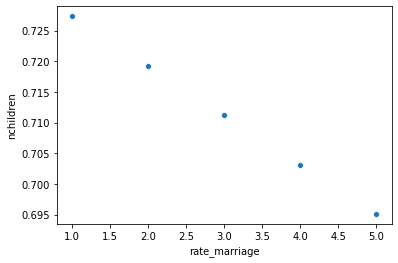

In [39]:
x = np.arange(1, 6)
y = reg[0] * x + reg[1]

ax = sns.scatterplot(x, y)
ax.set_xlabel('rate_marriage')
ax.set_ylabel('nchildren');

From this, we can see that the number of children has a weak correlation (slope is close to 0) with the length of marriage

# Problem 3

## a)

In [40]:
gb = data.groupby(['region'])['income_log'].agg(['mean', 'std', 'count'])
gb

,mean,std,count
region,,,
1,12.585123,0.702259,203
2,12.650101,0.659817,194
3,12.657765,0.615901,204


The hypotheses are:

$H_0$: There is no difference in income means (i.e. $\mu_1 = \mu_2$)

$H_1$: There is a difference (i.e. $\mu_1 > \mu_2$)

Assuming unequal variances, the test statistic:

$$ Z = \frac{\overline X_1 - \overline X_2}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}} \text{~} N(0, 1) \text{ (under} H_0\text{)} $$

as the sample size is quite large.

I will test the null hypothesis at $\alpha = 0.05$ significance level

Since the test is 1  tailed I have to tweak the z_pval function to compute the p-value of the test

In [41]:
def z_pval(z):
    # test is 1 tailed
    return 1 - norm.cdf(z)

In [42]:
z = z_score(gb['mean'][1], gb['mean'][2],
            gb['std'][1], gb['std'][2],
            gb['count'][1], gb['count'][2])

In [43]:
print(f'P-value: {z_pval(z)}')

P-value: 0.8290649921003472


P-value is greater than the chosen significance level, therefore, the null hypothesis cannot be rejected, which that there is not enough evidence in favor of the claim that on average the income in Moscow is greater than in Tver

## b)

In [44]:
vc = data['occupation'].value_counts()
vc

2    142
5    132
3    117
1    113
4     97
Name: occupation, dtype: int64

I assume that samples are independent (which should probably be the case)

The hypotheses are:

$H_0$: $\frac{n_{python}}{n_{data}}=4$

$H_1$: $\frac{n_{python}}{n_{data}} \ne 4$

Proportion of python developers: $$p_{python} = \frac{n_{python}}{n}$$
Proportion of data analysts: $$p_{data} = \frac{n_{data}}{n}$$

$$\frac{p_{python}}{p_{data}}
= \frac{\frac{n_{python}}{n}}{\frac{n_{data}}{n}}
= \frac{n_{python}}{n_{data}}$$

So, to test the belief that $\frac{n_{python}}{n_{data}}=4$, I can test the hypothesis that $\frac{\pi_{python}}{\pi_{data}}=4$

Sample sizes are quite large so
$$p_{python} \text{~} N(\pi_{python}, \frac{\pi_{python}(1-\pi_{python})}{n_{python}})$$
and
$$p_{data} \text{~} N(\pi_{data}, \frac{\pi_{data}(1-\pi_{data})}{n_{data}})$$

Under null hypothesis $ \pi_{python}=4 \pi_{data} $,
so $p_{python} \text{~} N(4 \pi_{data}, \frac{4 \pi_{data}(1-4 \pi_{data})}{n_{python}})$

Therefore,
$$p_{python} - 4p_{data} \text{~}
N(0, \frac{4 \pi_{data}(1-4 \pi_{data})}{n_{python}} + \frac{\pi_{data}(1-\pi_{data})}{n_{data}})$$

Using pooled proportion estimator to estimate $\pi_{data}$

$$ P = \frac{n_{python}+n_{data}}{5n}$$

$$ E(P) = E(\frac{n_{python}+n_{data}}{5n}) = 
\frac{E(n_{python})+E(n_{data})}{5n} = 
\frac{(4\pi_{data})n+\pi_{data}n}{5n} = 
\frac{5\pi_{data}n}{5n} = \pi_{data}
$$

Therefore,
$$p_{python} - 4p_{data} \text{~}
N(0, \frac{4P(1-4P)}{n_{python}} + \frac{P(1-P)}{n_{data}})$$

The test statistic used is:

$$\frac{p_{python} - 4p_{data}}{\sqrt{\frac{4P(1-4P)}{n_{python}} + \frac{P(1-P)}{n_{data}}}}
\text{~}
N(0, 1)$$

And the hypotheses tested:

$H_0$: $\frac{n_{python}}{n_{data}}=4$

$H_1$: $\frac{n_{python}}{n_{data}} \ne 4$

Using $\alpha=0.05$ significance level

In [45]:
n = data.shape[0]
n_python = data[data['occupation'] == 3].shape[0]
n_data = data[data['occupation'] == 2].shape[0]
p_python = n_python / n
p_data = n_data / n
pp = (n_python + n_data) / (5*n)

In [46]:
v1 = 4*pp*(1-4*pp)/n_python
v2 = pp*(1-pp)/n_data
z = (p_python - 4 * p_data) / np.sqrt(v1+v2)

In [47]:
print(f'Test statistic (Z-score): {z}')

Test statistic (Z-score): -15.052259138043617


Critical value for $\alpha=0.05$: (test is 2 tailed)

$Z_{\alpha/ \over 2} = 1.96$

|Z-score| $> Z_{\alpha/ \over 2}  \rightarrow $ the null hypothesis shoud be rejected, therefore, the belief is invalid

## c)

Since gender=sex, the problem is identical to 2f.

So, using the results obtained in 2f:

There is no gender income gap in each region

## d)

It is not clear from the problem statement what claim I am supposed to test

## e)

In [48]:
data['income_cat'] = pd.cut(data['income'], 4)

To test the hypothesis hypothesis that there is no association between the distribution of income and occupation area ,$\chi^2$ association test will be performed

Association test will be performed, with $\alpha=0.10$ significance level to test the hypotheses:

$H_0$: The distributions of income in each occupation are similar

$H_1$: At least one of the distributions is different

In [49]:
crosstab = pd.crosstab(data['income_cat'], data['occupation'])
crosstab

occupation,1,2,3,4,5
income_cat,,,,,
"(20577.349, 565636.675]",102,114,92,82,97
"(565636.675, 1108524.45]",11,23,22,12,34
"(1108524.45, 1651412.225]",0,4,2,3,1
"(1651412.225, 2194300.0]",0,1,1,0,0


In [50]:
pval = chi2_contingency(crosstab)[1]
print(f"P-value: {pval}")

P-value: 0.0521405155388912


Reported p-value is less than the significance level, therefore, there is enough evidence to reject the null hypothesis. So, the distribution of income is not similar within one occupation areas

# Problem 4

## a)

See https://i.imgur.com/Zp4kmMd.jpg

<img src="https://i.imgur.com/Zp4kmMd.jpg">